    #### **Exercise 1**

    Remove the outliers from the `sample_data_with_outliers.csv`!  Plot boxplots of the two features before and after outlier removal.  Try using different methods.  What works the best?
    

In [18]:
import pandas as pd
df = pd.read_csv("data/sample_data_with_outliers.csv")
df


,Age,Income,Purchase
0,76,75071,1
1,88,62405,0
2,82,61914,1
3,81,66843,1
4,62,30492,0
...,...,...,...
195,61,60764,1
196,64,49855,1
197,46,24735,0
198,29,60864,1


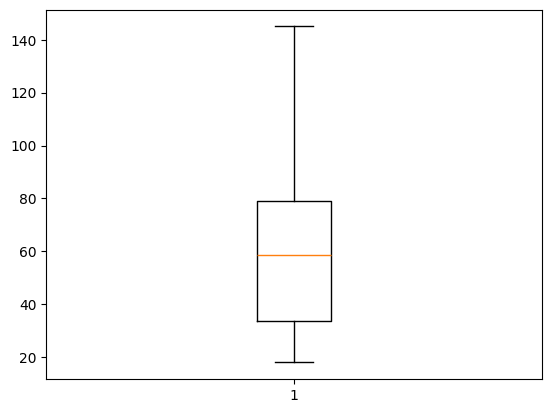

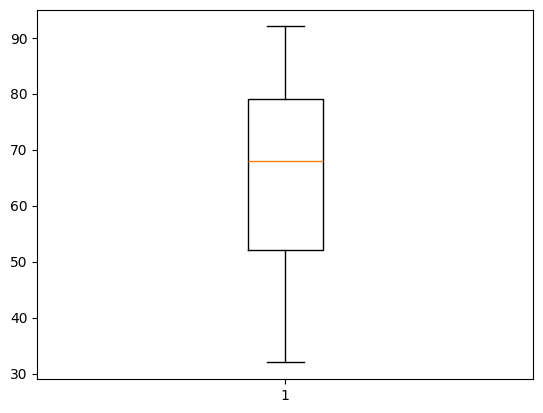

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

df1=pd.read_csv("data/sample_data_with_outliers.csv")
df1.head()

plt.boxplot(df1['Age'])
plt.show()

from sklearn.ensemble import IsolationForest

X = df1["Age"].values.reshape(-1, 1)
isolation_forest = IsolationForest(random_state=42)
outlier_pred = isolation_forest.fit_predict(X)
df1 = df1[outlier_pred == 1]

plt.boxplot(df1['Age'])
plt.show()

#### **Exercise 2**

In the following, I've created a sample dataset with an exponential feature and a normal feature. Try using the different scaling methods before running the classifier.  How do your results change:

1.  If you scale the exponential feature using a StandardScaler
2.  If you scale the exponential feature using a Log transform

Logistic Regression without Scaling - Test Accuracy: 0.72


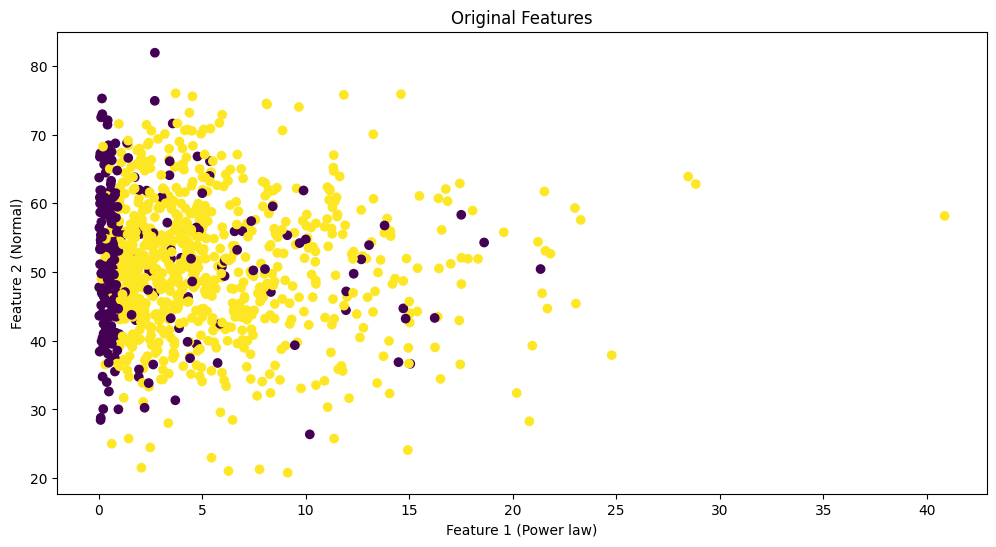

Logistic Regression with StandardScaler - Test Accuracy: 0.74


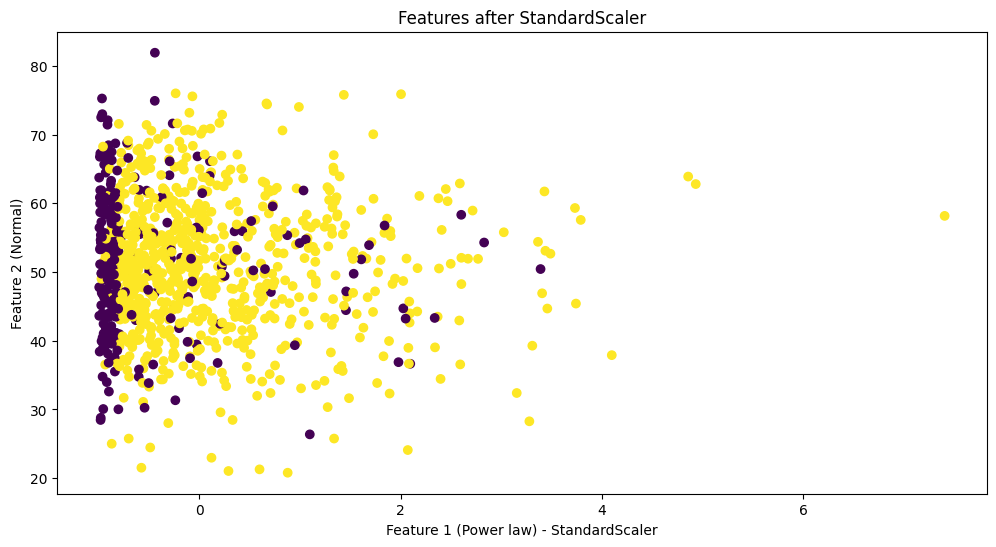

Logistic Regression with Log transform - Test Accuracy: 0.89


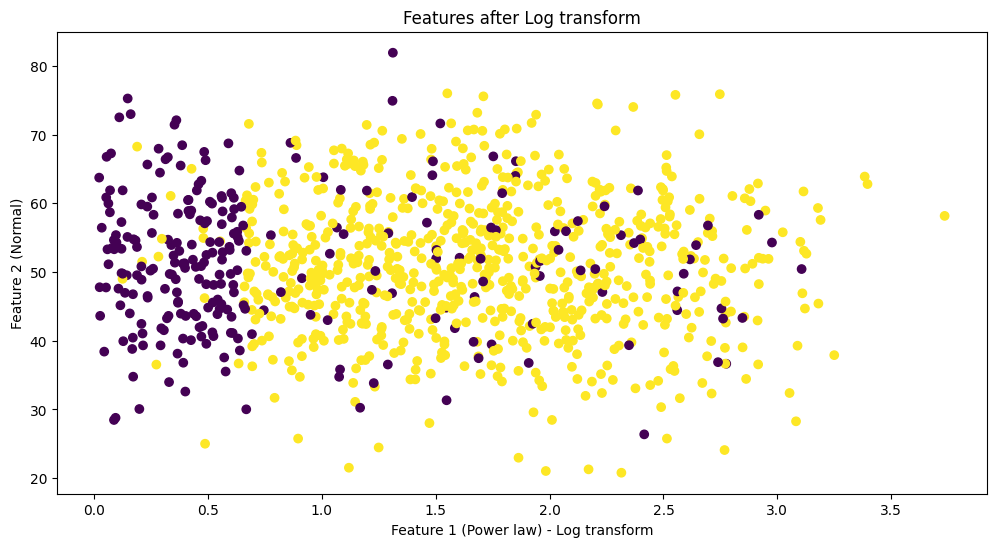

In [10]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PowerTransformer
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Create synthetic dataset
n_samples = 1000

# Feature 1: Power law (exponential) distribution
X1 = np.random.exponential(scale=5, size=n_samples)

# Feature 2: Normal distribution
X2 = np.random.normal(loc=50, scale=10, size=n_samples)

# Create labels: simple linear relation to X1 and X2
y = np.array([1 if x1 + 0.001 * x2 > 1 else 0 for x1, x2 in zip(X1, X2)])
flip_indices = np.random.choice(n_samples, size=int(0.1 * n_samples), replace=False)
y[flip_indices] = 1 - y[flip_indices]

# Combine features into a single data array
X = np.column_stack((X1, X2))

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression without scaling
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
print(f"Logistic Regression without Scaling - Test Accuracy: {lr.score(X_test, y_test):.2f}")

# Plot original features
plt.figure(figsize=(12, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel('Feature 1 (Power law)')
plt.ylabel('Feature 2 (Normal)')
plt.title('Original Features')
plt.show()

# Scale the exponential feature using StandardScaler
scaler_standard = StandardScaler()
X_scaled_standard = X.copy()
X_scaled_standard[:, 0] = scaler_standard.fit_transform(X[:, 0].reshape(-1, 1)).flatten()

# Logistic Regression with StandardScaler
lr_standard = LogisticRegression(max_iter=1000)
lr_standard.fit(X_scaled_standard, y)
print(f"Logistic Regression with StandardScaler - Test Accuracy: {lr_standard.score(X_scaled_standard, y):.2f}")

# Plot features after StandardScaler
plt.figure(figsize=(12, 6))
plt.scatter(X_scaled_standard[:, 0], X_scaled_standard[:, 1], c=y, cmap='viridis')
plt.xlabel('Feature 1 (Power law) - StandardScaler')
plt.ylabel('Feature 2 (Normal)')
plt.title('Features after StandardScaler')
plt.show()

# Scale the exponential feature using Log transform
X_scaled_log = X.copy()
X_scaled_log[:, 0] = np.log1p(X[:, 0])

# Logistic Regression with Log transform
lr_log = LogisticRegression(max_iter=1000)
lr_log.fit(X_scaled_log, y)
print(f"Logistic Regression with Log transform - Test Accuracy: {lr_log.score(X_scaled_log, y):.2f}")

# Plot features after Log transform
plt.figure(figsize=(12, 6))
plt.scatter(X_scaled_log[:, 0], X_scaled_log[:, 1], c=y, cmap='viridis')
plt.xlabel('Feature 1 (Power law) - Log transform')
plt.ylabel('Feature 2 (Normal)')
plt.title('Features after Log transform')
plt.show()


#### **Exercise 3**

The **Titanic dataset** (link to the data from [last week](../2-week2//data/titanic.csv)) contains the passenger list for all 768 passengers on the Titanic, as well as who survived. In this exercise, try using different methods for dealing with the nulls in the "age" column, and running the same classifier for the different methods (you might try a DecisionTreeClassifier, or a LogisticRegression classifier, or a SGDClassifier).  Which one gives the best result?  Why do you think that is?  Please only use the following columns for modeling: pclass, sex, age, sibsp, parch.  Be sure to try the following methods:

1. Fill forward, using 'ffill' in Pandas
2. Use a "mean" with a SimpleImputer
3. Use a "most_frequent" with a simple imputer
4. Use a KNN imputer from sklearn

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score

titanic_data = pd.read_csv("/workspaces/707-lecture-master/2-week2/data/titanic.csv")


# Select relevant columns
selected_columns = ['pclass', 'sex', 'age', 'sibsp', 'parch']
titanic_data = titanic_data[selected_columns + ['survived']]

# Split the data into features (X) and target variable (y)
X = titanic_data[selected_columns]
y = titanic_data['survived']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing steps for numeric and categorical features
numeric_features = ['age']
categorical_features = ['pclass', 'sex']

numeric_transformer_ffill = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=X_train['age'].ffill().iloc[0])),
])

numeric_transformer_mean = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
])

numeric_transformer_most_frequent = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
])

numeric_transformer_knn = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=5)),
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
])

# Combine transformers using ColumnTransformer
preprocessor_ffill = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer_ffill, numeric_features),
        ('cat', categorical_transformer, categorical_features),
    ])

preprocessor_mean = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer_mean, numeric_features),
        ('cat', categorical_transformer, categorical_features),
    ])

preprocessor_most_frequent = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer_most_frequent, numeric_features),
        ('cat', categorical_transformer, categorical_features),
    ])

preprocessor_knn = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer_knn, numeric_features),
        ('cat', categorical_transformer, categorical_features),
    ])

# Create a DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state=42)

# Create pipelines with preprocessing and the classifier for each method
pipelines = {
    'ffill': Pipeline(steps=[('preprocessor', preprocessor_ffill), ('classifier', classifier)]),
    'mean': Pipeline(steps=[('preprocessor', preprocessor_mean), ('classifier', classifier)]),
    'most_frequent': Pipeline(steps=[('preprocessor', preprocessor_most_frequent), ('classifier', classifier)]),
    'knn': Pipeline(steps=[('preprocessor', preprocessor_knn), ('classifier', classifier)]),
}

# Fit and evaluate each pipeline
for method_name, pipe in pipelines.items():
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy with {method_name} imputation: {accuracy:.2f}")


Accuracy with ffill imputation: 0.74
Accuracy with mean imputation: 0.74
Accuracy with most_frequent imputation: 0.75
Accuracy with knn imputation: 0.74


#### **Exercise 4**

Use the one-hot encoding method introduced in [](4-encoding.ipynb) for encoding multiple columns to one-hot encode the following data. 

In [29]:
sample = pd.DataFrame({
    'color': ['red', 'blue', 'green', 'red', 'blue', 'green'],
    'target': ['apple', 'sky', 'grass', 'sky', 'moon', 'apple'],
    'yumminess': [10,2,3,1,6,9]
})


   yumminess  color_blue  color_green  color_red  target_apple  target_grass  \
0         10       False        False       True          True         False   
1          2        True        False      False         False         False   
2          3       False         True      False         False          True   
3          1       False        False       True         False         False   
4          6        True        False      False         False         False   
5          9       False         True      False          True         False   

   target_moon  target_sky  
0        False       False  
1        False        True  
2        False       False  
3        False        True  
4         True       False  
5        False       False  


#### **Exercise 5**

In along with this notebook, there is a data file called `synthetic_patient_unbalanced.csv` which simulates a dataset of patients who have been examined for cardiovascular disease (CVD).  The data contains the following columns:

#### Columns:
1. **gender** (Categorical): Gender of the patient. (Male, Female)
2. **age** (Numeric): Age of the patient.
3. **bmi** (Numeric): Body Mass Index of the patient.
4. **systolic_bp** (Numeric): Systolic blood pressure level of the patient.
5. **diastolic_bp** (Numeric): Diastolic blood pressure level of the patient.
6. **cholesterol_level** (Numeric): Cholesterol level of the patient. 
7. **exercise_frequency** (Categorical): How often the patient exercises.
8. **smoker** (Categorical): Whether the patient is a smoker or not. (0=No, 1=Yes).
9. **family_history** (Categorical): Whether the patient has a family history of the disease. (0=No, 1=Yes).
10. **diet_quality** (Categorical): Quality of the patient's diet. 
11. **us_state** (Categorical): The US State where the patient resides.
12. **has_disease** (Binary): Whether the patient has the disease or not. (0=No, 1=Yes).

#### Task:

1. After pre-processing the data, perform an end-to-end analysis.  
2. Compare your results with and without re-balancing your classes.
3. Evaluate precision, recall, f1-score, and accuracy using 5-fold cross-validation.